In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("/Users/yang-jin-an/Downloads/finaldf.csv")

In [62]:
import numpy as np
from matplotlib import rc
%matplotlib inline


rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [63]:
plt.rcParams['font.family'] = 'Arial'

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56471 entries, 0 to 56470
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56471 non-null  int64  
 1   value                     56471 non-null  float64
 2   발생                        56471 non-null  int64  
 3   검거                        56471 non-null  int64  
 4   cggCd                     56471 non-null  int64  
 5   stdgCd                    56471 non-null  int64  
 6   mno                       56471 non-null  int64  
 7   sno                       56471 non-null  int64  
 8   flr                       56471 non-null  float64
 9   ctrtDay                   56471 non-null  int64  
 10  rentArea                  56471 non-null  float64
 11  grfe                      56471 non-null  int64  
 12  rtfe                      56471 non-null  int64  
 13  bldgUsg                   56471 non-null  object 
 14  newUpd

In [65]:
df.head()

,Unnamed: 0,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,...,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
0,0,3.50,4879,3411,11620,10300,1061,18,14.0,370,...,0,0,1,0,0,12,0,10,1,0.226657
1,1,3.25,4879,3411,11620,10200,1435,7,2.0,553,...,0,0,1,0,0,24,1,28,2,0.262968
2,2,3.50,4879,3411,11620,10200,1462,12,4.0,506,...,0,0,1,0,0,24,1,27,0,0.517072
3,3,3.50,4879,3411,11620,10100,1564,1,3.0,509,...,0,0,1,0,0,24,3,20,1,0.375666
4,4,3.50,4879,3411,11620,10200,1419,9,3.0,468,...,0,0,1,0,0,12,1,32,2,0.292742


In [66]:
df.drop(columns =['Unnamed: 0'], inplace=True)

## 1.전세가격에 영향을 주는 변수(요인) 파악

In [8]:
df.columns

Index(['value', '발생', '검거', 'cggCd', 'stdgCd', 'mno', 'sno', 'flr', 'ctrtDay',
       'rentArea', 'grfe', 'rtfe', 'bldgUsg', 'newUpdtYn', 'ctrtUpdtUseYn',
       'bfrGrfe', 'lat', 'lon', '자치구명_강남구', '자치구명_강서구', '자치구명_관악구', '자치구명_동작구',
       '자치구명_송파구', 'ctrtDayMonth', '500m_내_초중등수', '500m_내_bus수', '500m_내_마트수',
       'Closest_Station_Distance'],
      dtype='object')

In [ ]:
df

In [67]:
# 필요없는 변수 제거
heat_df=df.drop(columns=['자치구명_강남구', '자치구명_강서구','자치구명_관악구', '자치구명_동작구', '자치구명_송파구'])

In [68]:
heat_df.head()

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,newUpdtYn,ctrtUpdtUseYn,bfrGrfe,lat,lon,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
0,3.50,4879,3411,11620,10300,1061,18,14.0,370,28.05,...,1.0,0,0.0,37.474501,126.981391,12,0,10,1,0.226657
1,3.25,4879,3411,11620,10200,1435,7,2.0,553,19.50,...,1.0,0,0.0,37.485613,126.927327,24,1,28,2,0.262968
2,3.50,4879,3411,11620,10200,1462,12,4.0,506,21.84,...,0.0,0,13000.0,37.486241,126.924459,24,1,27,0,0.517072
3,3.50,4879,3411,11620,10100,1564,1,3.0,509,17.40,...,0.0,0,7000.0,37.479772,126.944626,24,3,20,1,0.375666
4,3.50,4879,3411,11620,10200,1419,9,3.0,468,27.32,...,0.0,0,11000.0,37.486612,126.931057,12,1,32,2,0.292742


In [69]:
# 건물용도 갯수 파악
heat_df["bldgUsg"].value_counts()

아파트      34098
연립다세대    14981
오피스텔      7392
Name: bldgUsg, dtype: int64

In [70]:
heat_replace = {"bldgUsg" : {"아파트":1, "연립다세대":2, "오피스텔":3}}
heat_df.replace(heat_replace, inplace=True)

In [71]:
heat_df

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,newUpdtYn,ctrtUpdtUseYn,bfrGrfe,lat,lon,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
0,3.50,4879,3411,11620,10300,1061,18,14.0,370,28.05,...,1.0,0,0.0,37.474501,126.981391,12,0,10,1,0.226657
1,3.25,4879,3411,11620,10200,1435,7,2.0,553,19.50,...,1.0,0,0.0,37.485613,126.927327,24,1,28,2,0.262968
2,3.50,4879,3411,11620,10200,1462,12,4.0,506,21.84,...,0.0,0,13000.0,37.486241,126.924459,24,1,27,0,0.517072
3,3.50,4879,3411,11620,10100,1564,1,3.0,509,17.40,...,0.0,0,7000.0,37.479772,126.944626,24,3,20,1,0.375666
4,3.50,4879,3411,11620,10200,1419,9,3.0,468,27.32,...,0.0,0,11000.0,37.486612,126.931057,12,1,32,2,0.292742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56466,3.50,4663,3591,11500,10300,424,23,4.0,218,31.68,...,1.0,0,0.0,37.531385,126.841776,24,0,16,1,0.435804
56467,3.50,4663,3591,11500,10300,105,357,5.0,218,24.30,...,1.0,0,0.0,37.542017,126.842321,24,3,26,2,0.173639
56468,3.50,4663,3591,11500,10300,1091,0,11.0,218,84.94,...,0.0,0,65000.0,37.544622,126.831443,24,6,4,0,0.630359
56469,3.50,4663,3591,11500,10300,410,296,4.0,218,46.77,...,1.0,0,0.0,37.537599,126.849658,24,1,35,0,0.698528


/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3

<AxesSubplot: >

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from curr

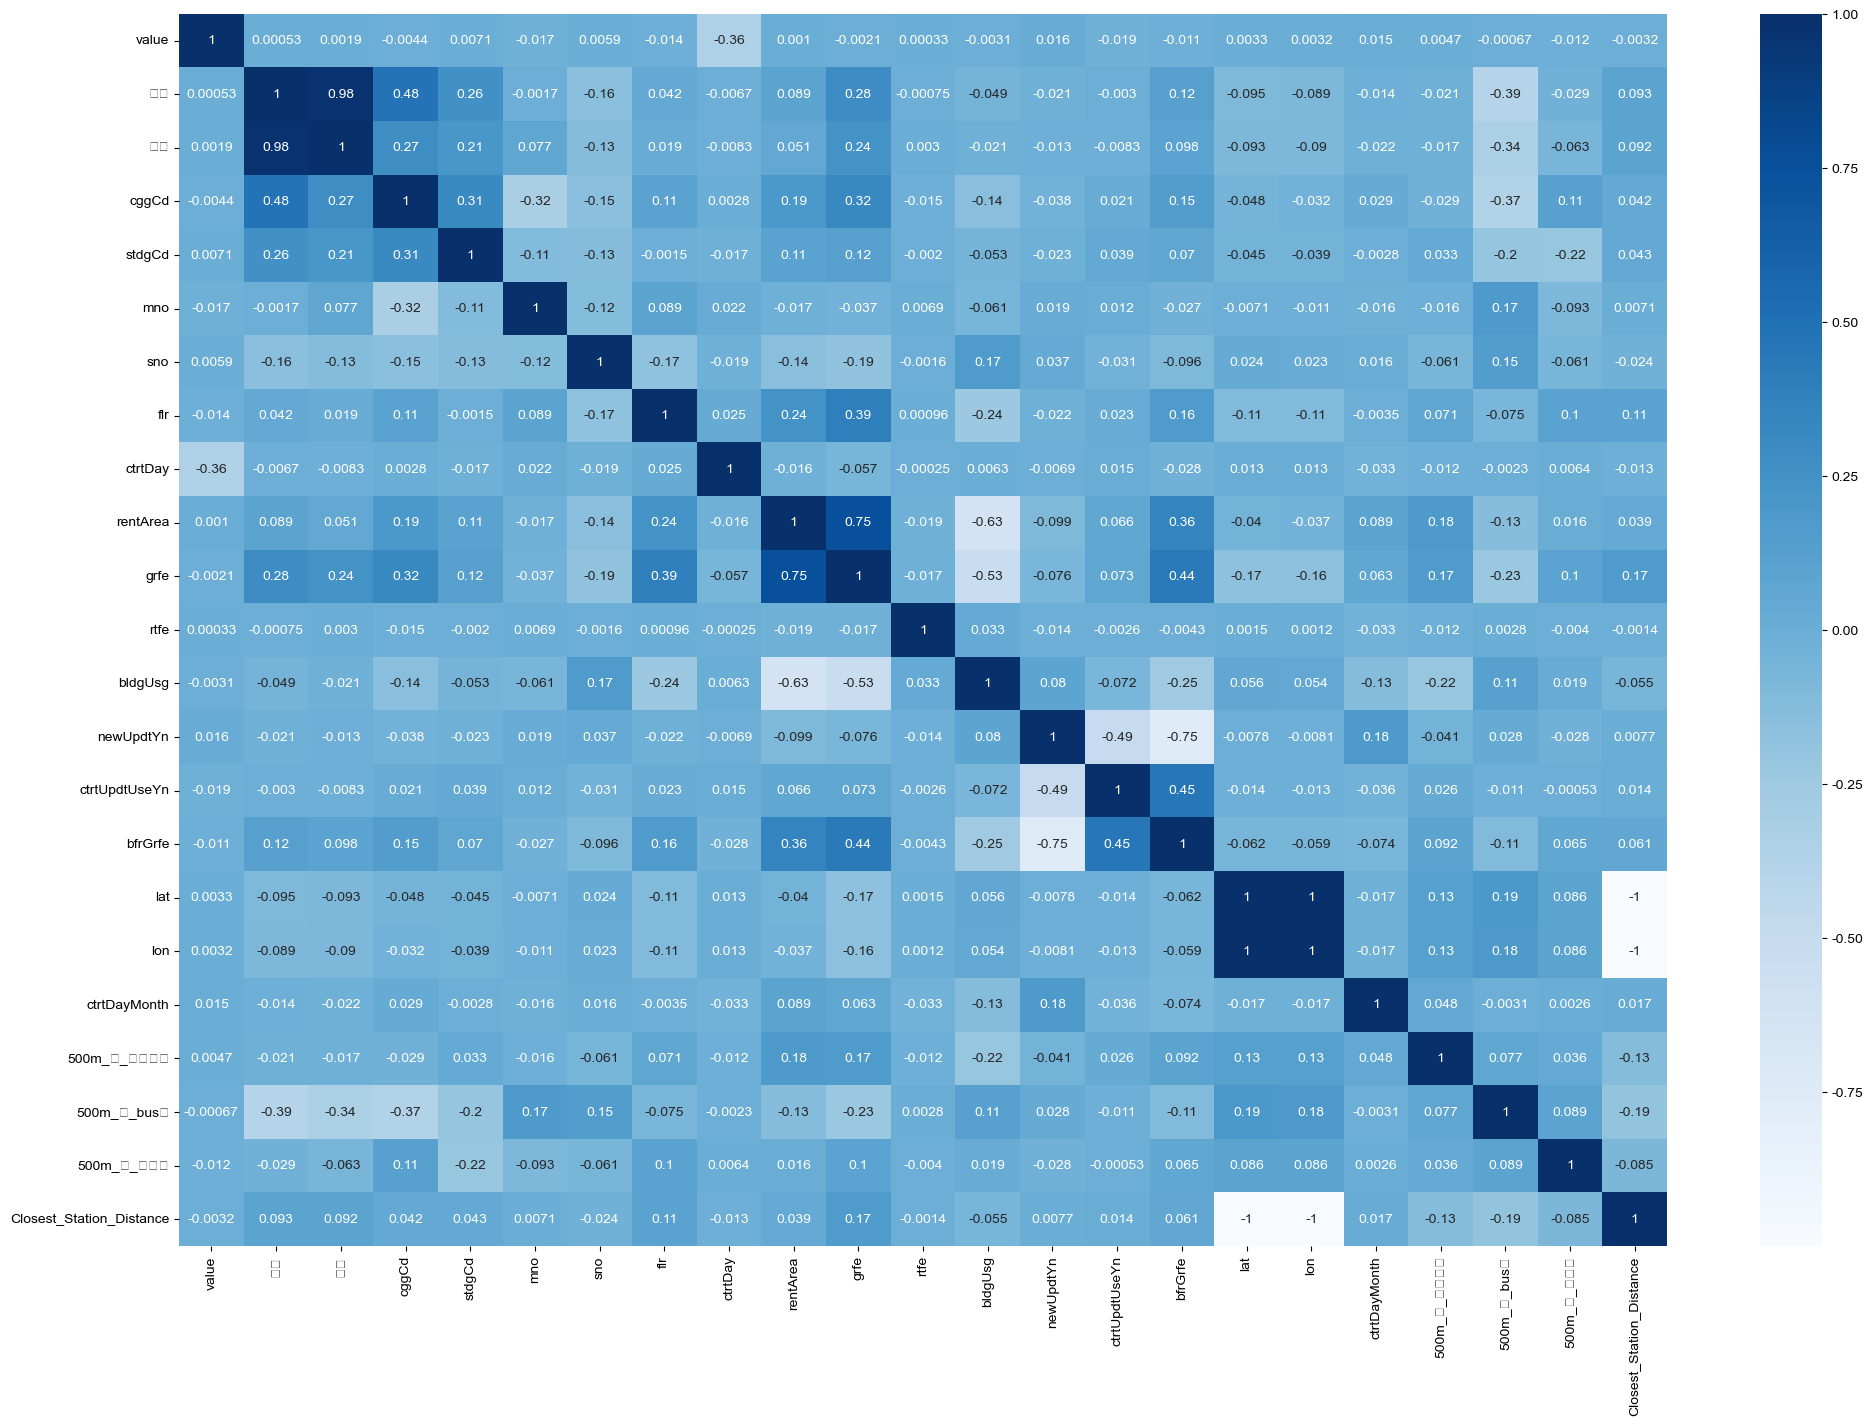

In [14]:
plt.figure(figsize=(24,16))
sns.heatmap(heat_df.corr(), annot=True, cmap="Blues")

## 상관계수를 통해 어떤 변수가 bfrGrfe(전세가)에 영향을 주는지 파악
### -상관계수가 1 , -1에 가까울 수록 영향을 준다
### -1에 가깝다 = x가 올라가면 y도 같이 올라간다
### - rentarea(임대면적) bldgusg(사용용도) bfrgrfe(종전보증금) flr (층) cggCd (자치구코드) 등이 전세가격에 크게 영향을 주는 것을 파악

In [72]:
# 상관계수를 통해 어ㄷ bfrGrfe(전세가)
heat_df2 = heat_df.corr()["grfe"].reset_index().sort_values("grfe", ascending=False)
abs(heat_df.corr())["grfe"].reset_index().sort_values("grfe", ascending=False)

,index,grfe
10,grfe,1.000000
9,rentArea,0.752207
12,bldgUsg,0.527376
15,bfrGrfe,0.436224
7,flr,0.394266
3,cggCd,0.320018
1,발생,0.284610
2,검거,0.235062
20,500m_내_bus수,0.228434
6,sno,0.186857


<AxesSubplot: xlabel='grfe', ylabel='rentArea'>

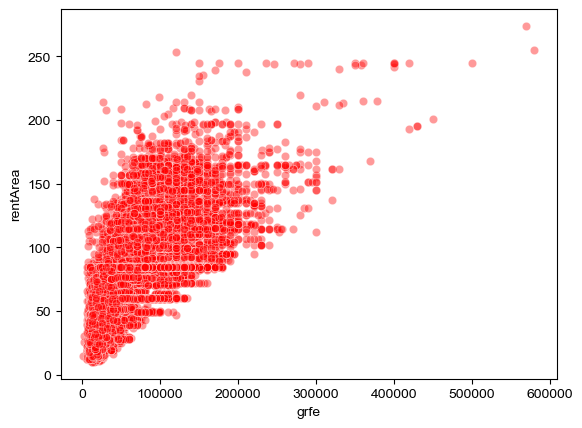

In [73]:
sns.scatterplot(data=df, x="grfe", y="rentArea",
               color="r", alpha=0.4
               )

#### 임대면적과 전세가 상관관계

<AxesSubplot: xlabel='grfe', ylabel='rentArea'>

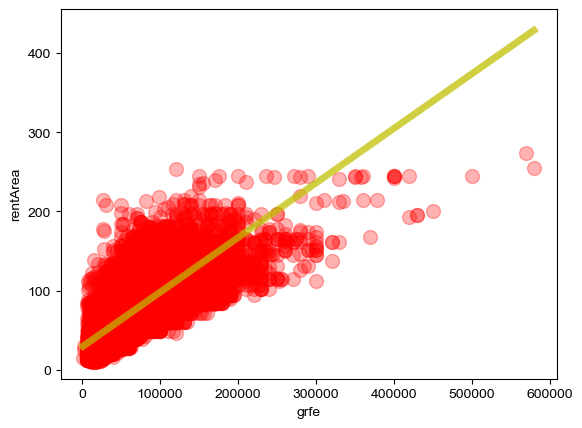

In [74]:
# 임대면적과 전세가 상관관계
sns.regplot(data=df, x="grfe", y="rentArea",
            scatter_kws={"color" :"red", "alpha":0.3, "s" : 100},
            line_kws={"color":"y", "alpha":0.7, "lw":5}\
           )

#### 층수와 전세가 상관관계

<AxesSubplot: xlabel='grfe', ylabel='flr'>

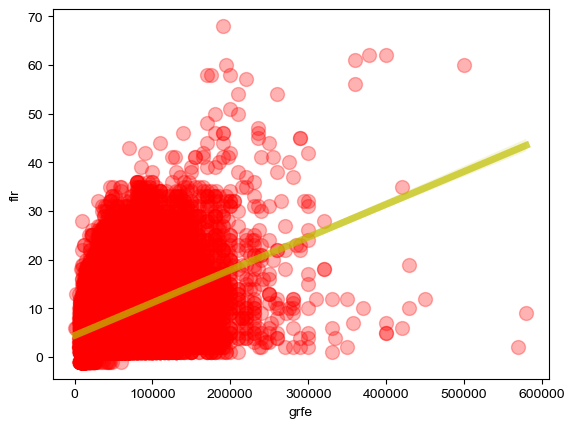

In [18]:
# 층수와 전세가 상관관계
sns.regplot(data=df, x="grfe", y="flr",
            scatter_kws={"color" :"red", "alpha":0.3, "s" : 100},
            line_kws={"color":"y", "alpha":0.7, "lw":5
                     })

## 2.자치구에 별 전세가 분석
### - 구에 따라 전세 가격이 차이가 나는것을 확인
### - 전세가 순위 -> 11680(강남구) 11710(송파구) 11590(동작구) 11620(관악구) 11500(강서구) 

In [19]:
# 구 기준으로 groupby 후 정렬
cggCd_df = df.groupby("cggCd").mean().reset_index().sort_values(by="grfe")

<AxesSubplot: xlabel='cggCd', ylabel='grfe'>

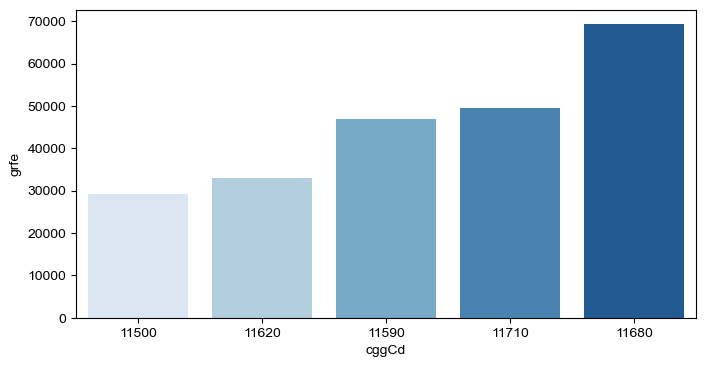

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(data=cggCd_df, x="cggCd", y="grfe", palette="Blues", order=cggCd_df["cggCd"])

<AxesSubplot: xlabel='stdgCd', ylabel='grfe'>

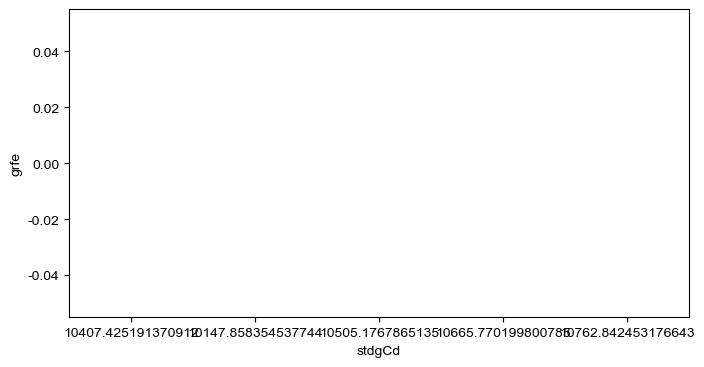

In [58]:
# 동 기준으로 groupby 후 정렬
stdgCd_df = df.groupby("stdgCd").mean().reset_index().sort_values(by="grfe")
plt.figure(figsize=(8,4))
sns.barplot(data=stdgCd_df, x="stdgCd", y="grfe", palette="Blues", order=cggCd_df["stdgCd"])

In [57]:
stdgCd_df

,stdgCd,value,발생,검거,cggCd,mno,sno,flr,ctrtDay,rentArea,...,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
7,10800,3.487275,5144.632735,3505.635729,11673.196108,334.958333,9.974551,6.869012,395.752745,53.465651,...,0.188124,0.073104,0.000000,0.131737,0.607036,23.104291,1.909681,18.466567,1.188623,0.450360
2,10300,3.487114,5393.565856,3992.531028,11576.618541,613.428445,26.959473,6.522796,393.435030,54.422941,...,0.305598,0.573961,0.030268,0.007979,0.082194,23.470365,1.915400,18.576748,0.864488,258.694694
8,10900,3.487633,4412.670632,3153.657483,11580.851597,739.469317,13.701002,8.116781,392.256731,63.934449,...,0.000000,0.496556,0.000000,0.207264,0.296180,23.401064,2.774890,19.804947,0.481215,0.593099
3,10400,3.490305,4970.526008,3545.232071,11607.719298,570.046476,5.691597,6.906125,388.413358,59.862518,...,0.130502,0.417051,0.000000,0.089874,0.362573,23.437058,2.922438,17.024931,1.148969,4.503669
1,10200,3.486498,4287.608378,3023.655963,11588.695081,633.934754,28.517881,7.959568,392.530434,60.949387,...,0.000000,0.314553,0.259670,0.265655,0.160123,23.572033,2.740038,20.650562,1.119399,123.440974
10,11100,3.489338,5433.783103,3650.453696,11705.503656,166.953696,3.998375,7.460195,388.947197,56.478314,...,0.149878,0.000000,0.000000,0.000000,0.850122,23.183591,2.520715,12.652721,1.080829,0.683506
11,11200,3.486151,5966.079137,4132.211511,11696.532374,365.111511,1.832374,6.430935,390.578417,63.766094,...,0.448921,0.000000,0.000000,0.000000,0.551079,23.197122,2.390647,13.760432,0.597842,0.885756
12,11300,3.491051,5208.812081,3446.842282,11709.295302,409.031320,3.700224,8.289709,371.961969,64.924049,...,0.023490,0.000000,0.000000,0.000000,0.976510,23.496644,2.855705,15.328859,0.426174,176.972840
4,10500,3.486813,4754.860939,3450.258941,11579.180819,455.729870,8.834965,7.381219,403.310290,55.872797,...,0.166034,0.491109,0.000000,0.189211,0.153646,22.442557,1.852547,16.243556,1.053347,0.445497
14,11500,3.487593,6947.000000,5020.000000,11680.000000,741.661290,0.000000,8.000000,389.660050,56.689529,...,1.000000,0.000000,0.000000,0.000000,0.000000,23.579404,2.297767,13.311414,0.000000,0.367879


## 용도별 전세가 분석
### - 주거공간 차이에 따라 유의미한 전세가격 차이가 있다고 판단
### - 전세가격 순위 -> 아파트, 연립다세대, 오피스텔 

In [22]:
# 용도 기준으로 groupby 후 정렬
bldgUsg_df = df.groupby("bldgUsg").mean().reset_index().sort_values(by="grfe")

In [23]:
bldgUsg_df

,bldgUsg,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,...,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
2,오피스텔,3.486201,5177.542208,3737.143398,11600.921266,10557.210498,612.410850,8.947105,8.206710,398.855519,...,0.173431,0.459416,0.054248,0.020969,0.291937,22.134876,1.675460,18.040449,1.324540,21.785240
1,연립다세대,3.488853,4969.191576,3503.129364,11621.918430,10505.540351,403.466057,41.219478,3.218543,386.671784,...,0.153127,0.281957,0.106602,0.122355,0.335959,23.458781,2.227154,18.836593,1.123356,5.857428
0,아파트,3.487631,5232.040648,3688.844712,11635.828788,10586.386298,590.844038,3.486715,9.423163,392.560619,...,0.294416,0.197959,0.079711,0.138278,0.289636,23.584462,2.716640,16.364860,1.193912,155.557493


<AxesSubplot: xlabel='bldgUsg', ylabel='grfe'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 53588 (\N{HANGUL SYLLABLE TEL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current 

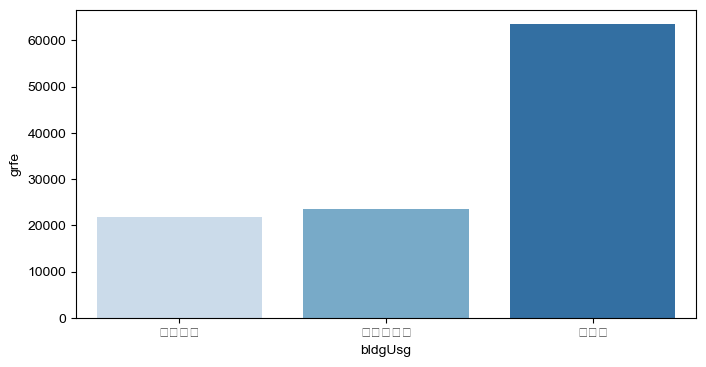

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(data=bldgUsg_df, x="bldgUsg", y="grfe", palette="Blues", order=bldgUsg_df["bldgUsg"])

## 층수 전세가 상세분석
### -층수를 높이에 따라 low mid high very high 네가지 범주로 나눠 분석진행
### -높은 층이 상대적으로 전세 가격이 높은걸 확인


In [25]:
# 용도별 층수 분석
df.groupby("bldgUsg")["flr"].agg({"mean", "min", "max", "std", "var"})

,mean,min,max,var,std
bldgUsg,,,,,
아파트,9.423163,1.0,68.0,41.164067,6.415923
연립다세대,3.218543,-1.0,19.0,3.130473,1.769314
오피스텔,8.206710,1.0,26.0,16.876762,4.108134


<AxesSubplot: xlabel='bldgUsg', ylabel='flr'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 53588 (\N{HANGUL SYLLABLE TEL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current 

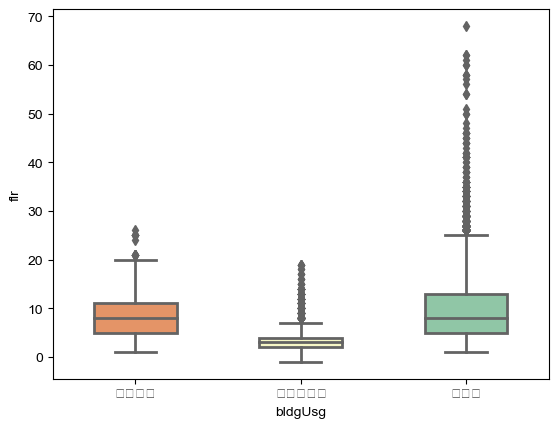

In [26]:
sns.boxplot(x="bldgUsg", y="flr", data=df, palette="Spectral", linewidth=2, width=0.5)

In [27]:
df[df["bldgUsg"] == "아파트"]["flr"].describe()

count    34098.000000
mean         9.423163
std          6.415923
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         68.000000
Name: flr, dtype: float64

In [28]:
df[df["bldgUsg"] == "연립다세대"]["flr"].describe()

count    14981.000000
mean         3.218543
std          1.769314
min         -1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         19.000000
Name: flr, dtype: float64

In [29]:
df[df["bldgUsg"] == "오피스텔"]["flr"].describe()

count    7392.000000
mean        8.206710
std         4.108134
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        26.000000
Name: flr, dtype: float64

In [30]:
def flr_converter(x) :
    if x >= 1 and x <= 5 :
        return "low"
    elif x >=6 and x <= 13 :
        return "mid"
    elif x >= 14 and x <= 30 :
        return "high"
    else :
        return "very high"

In [31]:
flr_converter(2.0)

'low'

In [32]:
df["flr_cat"] = df["flr"].apply( lambda x : flr_converter(x))

In [33]:
df[["flr", "flr_cat"]]

,flr,flr_cat
0,14.0,high
1,2.0,low
2,4.0,low
3,3.0,low
4,3.0,low
...,...,...
56466,4.0,low
56467,5.0,low
56468,11.0,mid
56469,4.0,low


In [34]:
apart_df = df[df["bldgUsg"] == "아파트"]

In [35]:
# 구 기준으로 groupby 후 정렬
apart_df_group = apart_df.groupby("flr_cat")["grfe"].mean().reset_index().sort_values(by="grfe")

In [36]:
apart_df["flr_cat"].value_counts()

mid          15648
low          10896
high          7284
very high      270
Name: flr_cat, dtype: int64

In [37]:
apart_df_group

,flr_cat,grfe
1,low,58242.126468
2,mid,60520.618865
0,high,74831.601181
3,very high,138306.085185


<AxesSubplot: xlabel='flr_cat', ylabel='grfe'>

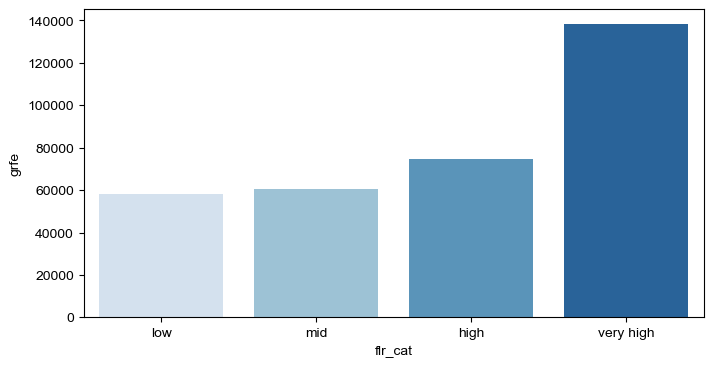

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(data=apart_df_group, x="flr_cat", y="grfe", palette="Blues", order=apart_df_group["flr_cat"])

## 인프라
### 구 동 별 주변 500미터 내 학교 버스 마트 개수 분석

In [39]:
infra_df = df.groupby("cggCd")[["500m_내_초중등수", "500m_내_bus수", "500m_내_마트수"]].mean().reset_index()

In [40]:
infra_df

,cggCd,500m_내_초중등수,500m_내_bus수,500m_내_마트수
0,11500,2.660195,20.090327,1.087683
1,11590,2.121886,23.355363,0.899746
2,11620,2.379135,21.832273,1.300891
3,11680,2.185898,13.473742,0.867573
4,11710,2.633796,14.173551,1.624304


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3

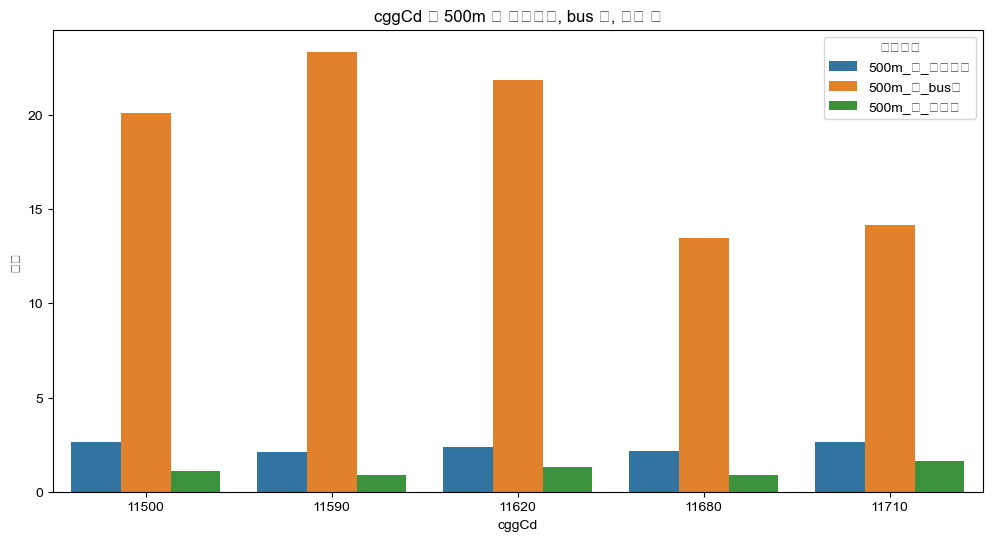

In [41]:
df_melted = infra_df.melt(id_vars='cggCd', var_name='Category', value_name='Value')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='cggCd', y='Value', hue='Category')
plt.title('cggCd 별 500m 내 초중등수, bus 수, 마트 수')
plt.xlabel('cggCd')
plt.ylabel('수치')
plt.legend(title='카테고리')
plt.show()

In [42]:
infra_df = df.groupby("stdgCd")[["500m_내_초중등수", "500m_내_bus수", "500m_내_마트수"]].mean().reset_index()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3

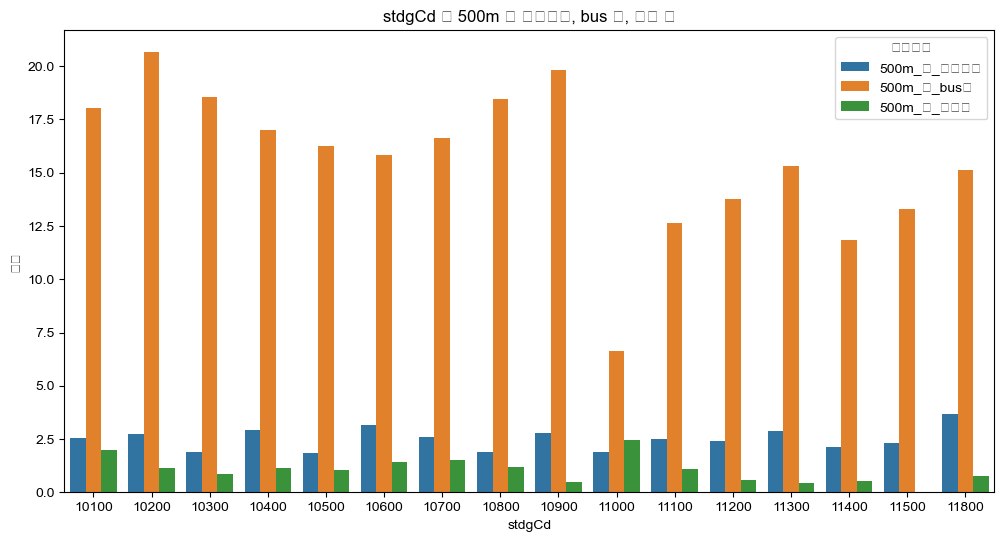

In [43]:
df_melted = infra_df.melt(id_vars='stdgCd', var_name='Category', value_name='Value')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='stdgCd', y='Value', hue='Category')
plt.title('stdgCd 별 500m 내 초중등수, bus 수, 마트 수')
plt.xlabel('stdgCd')
plt.ylabel('수치')
plt.legend(title='카테고리')
plt.show()

## 치안
### - 구, 동 별 범죄발생 검거 분석
### - 범죄 발생 검거 순위 -> 11680(강남구) 11710(송파구)  11620(관악구) 11500(강서구) 11590(동작구)

In [44]:
safety_df = df.groupby("cggCd").mean()["발생"].reset_index().sort_values(by="발생")

In [75]:
df["발생"].value_counts()

5167    17067
4663    14370
6947    13615
2735     6703
4879     4716
Name: 발생, dtype: int64

In [89]:
df[df["cggCd"] == 11620]

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance,1인당범죄
0,3.50,4879,3411,11620,10300,1061,18,14.0,370,28.05,...,0,1,0,0,12,0,10,1,0.226657,6947
1,3.25,4879,3411,11620,10200,1435,7,2.0,553,19.50,...,0,1,0,0,24,1,28,2,0.262968,6947
2,3.50,4879,3411,11620,10200,1462,12,4.0,506,21.84,...,0,1,0,0,24,1,27,0,0.517072,6947
3,3.50,4879,3411,11620,10100,1564,1,3.0,509,17.40,...,0,1,0,0,24,3,20,1,0.375666,6947
4,3.50,4879,3411,11620,10200,1419,9,3.0,468,27.32,...,0,1,0,0,12,1,32,2,0.292742,6947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56396,3.50,4879,3411,11620,10100,635,449,2.0,218,29.14,...,0,1,0,0,24,2,29,2,0.811622,6947
56399,3.50,4879,3411,11620,10200,610,317,3.0,218,42.28,...,0,1,0,0,36,1,21,0,1.012876,6947
56419,3.50,4879,3411,11620,10100,719,5,4.0,212,88.14,...,0,1,0,0,24,2,27,0,0.849503,6947
56434,3.50,4879,3411,11620,10200,255,189,8.0,213,84.44,...,0,1,0,0,24,1,6,0,2.107621,6947


In [84]:
df["1인당범죄"] = 6947

In [86]:
df[df["cggCd"] == 11680]["1인당범죄"] = 6947 / 556750

/var/folders/b3/s__nhkss19x93f95jpn96grm0000gn/T/ipykernel_91166/3125738107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["cggCd"] == 11680]["1인당범죄"] = 6947 / 556750


In [92]:
def converter(x) :
  if x == 11680 :
    return 6947 / 556750
  elif x == 11710 :
    return 5167 / 654166
  elif x == 11620 :
    return 4879 / 487038
  elif x == 11500 :
    return 4663 / 559335
  else :
    return 4879 / 394118

In [97]:
df["1인당범죄"] = df["cggCd"].apply(lambda x : converter(x))

In [ ]:
df["1인당범죄"]

In [98]:
df.groupby("1인당범죄").mean()|""

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,자치구명_강남구,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance
1인당범죄,,,,,,,,,,,,,,,,,,,,,
0.007899,3.487198,5167.0,3409.0,11710.0,10665.770200,256.443253,4.048749,8.338724,394.418820,63.366659,...,0.0,0.0,0.0,0.0,1.0,23.383957,2.633796,14.173551,1.624304,9.770432
0.008337,3.488118,4663.0,3591.0,11500.0,10407.425191,696.974878,19.318859,6.682533,392.111134,49.905215,...,0.0,1.0,0.0,0.0,0.0,23.095407,2.660195,20.090327,1.087683,5.966738
0.010018,3.486111,4879.0,3411.0,11620.0,10147.858355,1225.900551,40.794741,7.393554,392.257422,58.443414,...,0.0,0.0,1.0,0.0,0.0,23.596480,2.379135,21.832273,1.300891,184.830087
0.012380,3.488475,2735.0,1741.0,11590.0,10505.176787,441.708936,28.735790,7.396091,390.278084,68.431237,...,0.0,0.0,0.0,1.0,0.0,23.676563,2.121886,23.355363,0.899746,10.326525
0.012478,3.488340,6947.0,5020.0,11680.0,10762.842453,556.995813,5.201616,7.888579,388.872494,70.652693,...,1.0,0.0,0.0,0.0,0.0,23.377158,2.185898,13.473742,0.867573,320.206732


<AxesSubplot: xlabel='1인당범죄', ylabel='grfe'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLAB

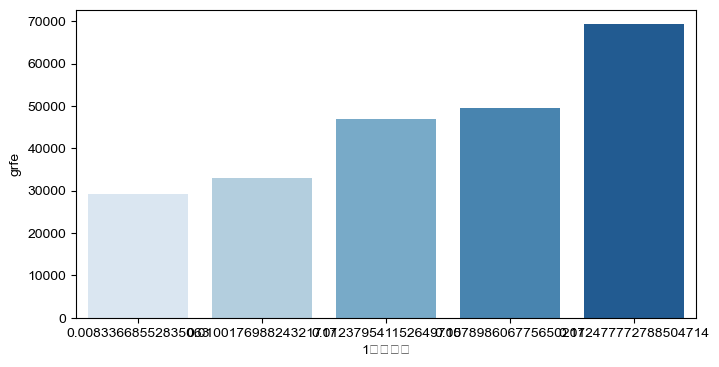

In [96]:
safety_df = df.groupby("1인당범죄").mean()["grfe"].reset_index().sort_values(by="grfe")
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="1인당범죄", y="grfe", palette="Blues", order= safety_df["1인당범죄"])

In [90]:
df[df["cggCd"] == 11500]

,value,발생,검거,cggCd,stdgCd,mno,sno,flr,ctrtDay,rentArea,...,자치구명_강서구,자치구명_관악구,자치구명_동작구,자치구명_송파구,ctrtDayMonth,500m_내_초중등수,500m_내_bus수,500m_내_마트수,Closest_Station_Distance,1인당범죄
14,3.50,4663,3591,11500,10300,1111,0,13.0,540,18.02,...,1,0,0,0,12,3,27,1,0.738741,6947
21,3.50,4663,3591,11500,10300,1070,28,2.0,424,54.27,...,1,0,0,0,24,1,13,3,0.543384,6947
116,3.50,4663,3591,11500,10300,1086,29,1.0,417,50.88,...,1,0,0,0,24,2,17,2,0.497363,6947
153,3.25,4663,3591,11500,10500,795,1,4.0,555,22.16,...,1,0,0,0,12,1,21,1,0.235433,6947
159,3.50,4663,3591,11500,10300,1079,28,3.0,337,38.79,...,1,0,0,0,24,2,24,3,0.182049,6947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56465,3.50,4663,3591,11500,10300,343,49,10.0,218,29.44,...,1,0,0,0,24,0,19,1,0.042344,6947
56466,3.50,4663,3591,11500,10300,424,23,4.0,218,31.68,...,1,0,0,0,24,0,16,1,0.435804,6947
56467,3.50,4663,3591,11500,10300,105,357,5.0,218,24.30,...,1,0,0,0,24,3,26,2,0.173639,6947
56468,3.50,4663,3591,11500,10300,1091,0,11.0,218,84.94,...,1,0,0,0,24,6,4,0,0.630359,6947


<AxesSubplot: xlabel='cggCd', ylabel='발생'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


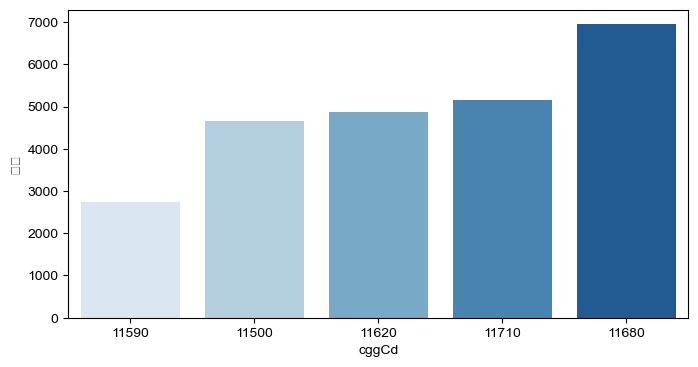

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="cggCd", y="발생", palette="Blues", order=safety_df["cggCd"])

In [46]:
safety_df = df.groupby("stdgCd").mean()["발생"].reset_index().sort_values(by="발생")

<AxesSubplot: xlabel='stdgCd', ylabel='발생'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


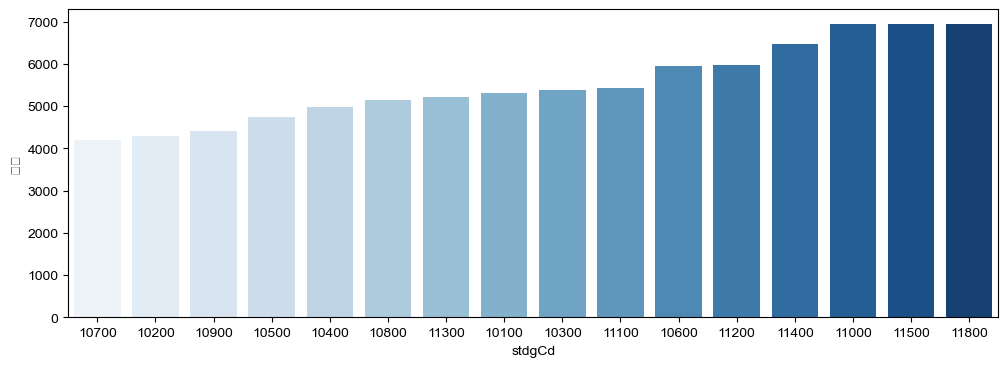

In [47]:
plt.figure(figsize=(12,4))
sns.barplot(data=safety_df, x="stdgCd", y="발생", palette="Blues", order=safety_df["stdgCd"])

<AxesSubplot: xlabel='cggCd', ylabel='검거'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


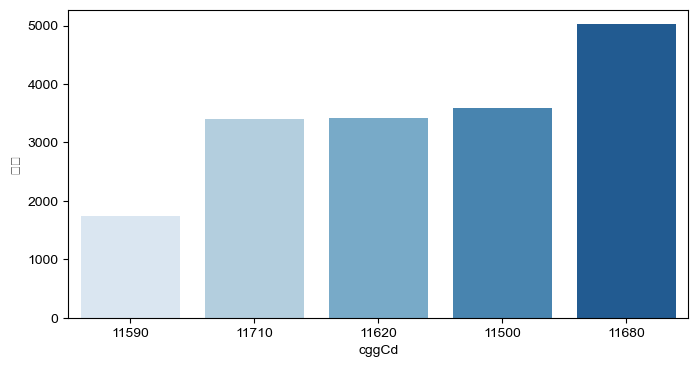

In [48]:
safety_df = df.groupby("cggCd").mean()["검거"].reset_index().sort_values(by="검거")
plt.figure(figsize=(8,4))
sns.barplot(data=safety_df, x="cggCd", y="검거", palette="Blues", order=safety_df["cggCd"])

<AxesSubplot: xlabel='stdgCd', ylabel='검거'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


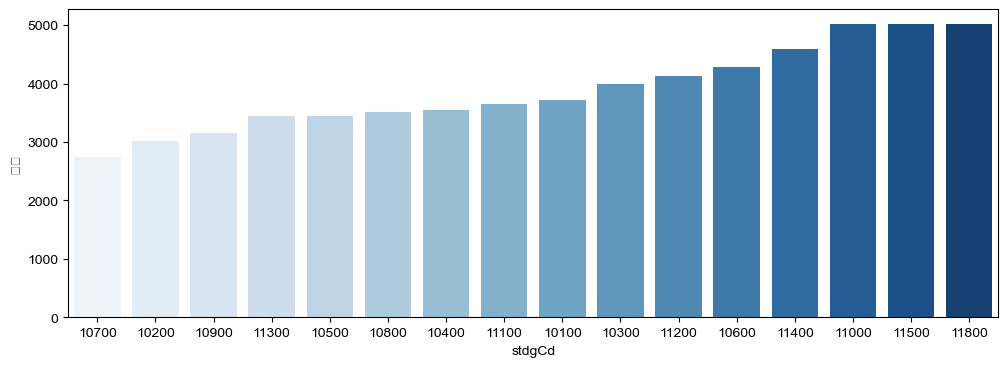

In [49]:
safety_df = df.groupby("stdgCd").mean()["검거"].reset_index().sort_values(by="검거")
plt.figure(figsize=(12,4))
sns.barplot(data=safety_df, x="stdgCd", y="검거", palette="Blues", order=safety_df["stdgCd"])

In [50]:
df["발생"].value_counts()

5167    17067
4663    14370
6947    13615
2735     6703
4879     4716
Name: 발생, dtype: int64

## 지하철 거리와 따른 가격 분석
### - 이상치를 제거하고 시각해 본 결과 큰 상관관계는 알기 힘들었음

df["Closest_Station_Distance"].describe()

In [51]:
pro_df = df[df["Closest_Station_Distance"] < 1]

In [52]:
pro_df["grfe"].describe()

count     51793.000000
mean      47424.669473
std       34614.477885
min        1000.000000
25%       22600.000000
50%       38000.000000
75%       62000.000000
max      580000.000000
Name: grfe, dtype: float64

In [59]:
pro_df = pro_df[pro_df["grfe"] < 300000.000000]

In [54]:
pro_df["Closest_Station_Distance"].describe()

count    38765.000000
mean         0.474992
std          0.215304
min          0.023490
25%          0.305777
50%          0.453877
75%          0.636688
max          0.999938
Name: Closest_Station_Distance, dtype: float64

<AxesSubplot: xlabel='grfe', ylabel='Closest_Station_Distance'>

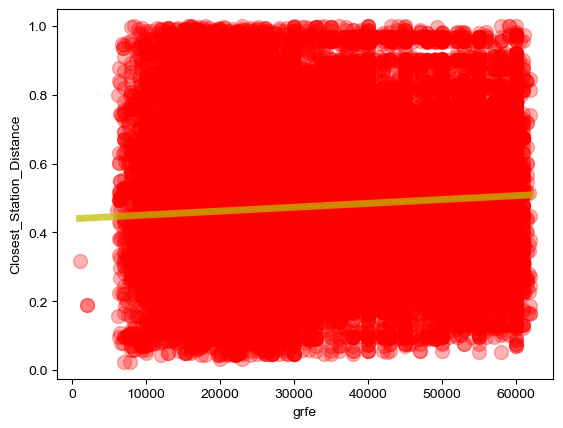

In [55]:
sns.regplot(data=pro_df, x="grfe", y="Closest_Station_Distance",
            scatter_kws={"color" :"red", "alpha":0.3, "s" : 100},
            line_kws={"color":"y", "alpha":0.7, "lw":5
                     })